# Assignment 5

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel→→Restart) and then run all cells (in the menubar, select Cell→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [0]:
NAME = "Bhishek"
STUDENT_ID = "1566863"

## Assignment Overview
In this assignment, you'll answer questions and perform computer experiments involving various traditional machine learning techniques, including KMeans, support vector machines (with various kernels), and principal component analysis.

## KMeans

## Problem 1
You are given the points below, and will implement k-means for $k=3$ on these points.  Use Euclidean distance (L2) for our distance measure.

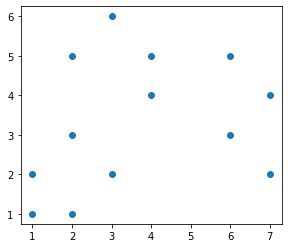

In [2]:
import numpy as np
from matplotlib import pylab as plt

points = np.array([[1, 1], [1, 2], [2, 1], [3, 2], [6, 3], [6, 5], [2, 5],
                   [7, 2], [7, 4], [2, 3], [3, 6], [4, 4], [4, 5]])

# Plot these points.
plt.axes().set_aspect('equal')
plt.scatter(points[:, 0], points[:, 1])

We'll next pick 3 initial "centers" for our three clusters.  DON'T CHANGE THE SEED!

In [3]:
from numpy.random import randint

np.random.seed(43)
centers = np.array([[randint(1, 7), randint(1, 7)] for _ in range(3)])
centers

array([[5, 1],
       [2, 6],
       [3, 1]])

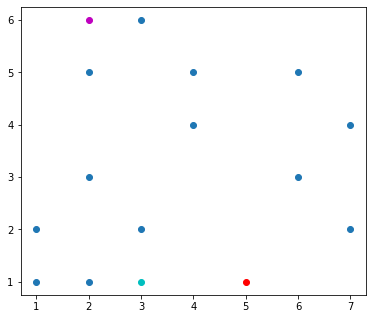

In [4]:
# Plot these points.
fig = plt.figure()
#plt.axes().set_aspect('equal')
ax = fig.add_axes([0,0,1,1], aspect='equal')
#ax.axes().set_aspect('equal')
ax.scatter(points[:, 0], points[:, 1])
ax.scatter(centers[0, 0], centers[0, 1], c = 'r')
ax.scatter(centers[1, 0], centers[1, 1], c = 'm')
ax.scatter(centers[2, 0], centers[2, 1], c = 'c')
plt.show()

## Problem 1(a)  

Code up a function, nearest_points, that takes as inputs the points and k centers, and returns a dictionary with keys $\{0, 1, \cdots , k\}$ and entries consisting of a list, the first entry of which is the xy-coordinates of the current first group center, and the rest of the entries are all of the points currently associated with that center.  Then apply your function to the points and initial centers we randomly selected above.

### Test Case
For example, if the input points and centers are 

    points = np.array([[0,1], [0,3], [3,1], [3,3], [6,1], [6,3], [9,1], [9,3]])
    centers = np.array([[0,2], [3,2], [6,2], [9,2]])

then your function should output the following dictionary:

    {0: [[0,2], [0,1], [0,3],
     1: [[3,2], [3,1], [3,3]],  
     2: [[6,2], [6,1], [6,3]], 
     3: [[9,2], [9,1], [9,3]]}

In [0]:
def nearest_points(centers, points):
    clusters = dict()
    # Add the centers first to the cluster
    for k in np.arange(centers.shape[0]):
      clusters.setdefault(k,[])
      clusters[k].append([centers[k][0],centers[k][1]])
    for i in np.arange(points.shape[0]):
      dist_new=[]
      for j in np.arange(centers.shape[0]):
        dist = np.sqrt((centers[j][0]-points[i][0])**2 + (centers[j][1]-points[i][1])**2)
        # Calculate distance between points and the center
        dist_new.append(dist)
      # Find the location of the minimum distance
      loc = dist_new.index(min(dist_new))
      # Add the point that is at minimum distance from the center to the corresponding cluster
      clusters.setdefault(loc,[]).append([points[i][0],points[i][1]])
    return clusters

In [6]:
# Now apply this function to the points defined above (not the test case just given) 
# where we randomly chose 3 initial cluster centers.
clusters = nearest_points(centers, points)
clusters

{0: [[5, 1], [6, 3], [6, 5], [7, 2], [7, 4]],
 1: [[2, 6], [2, 5], [3, 6], [4, 4], [4, 5]],
 2: [[3, 1], [1, 1], [1, 2], [2, 1], [3, 2], [2, 3]]}

## Problem 1(b) 

Create a function, compute_new_centers, that takes as inputs a cluster dictionary like the output of your nearest_points function, and the original list of points we're trying to classify. This function's output will be a new cluster dictionary, with each new center equal to the centroid of its initial cluster. Then apply this function to your initial clusters and points. You may want to call your above function, nearest_points.

In [0]:
def compute_new_centers(clusters, points):

    new_center = []
    new_clusters = dict()
    for i,j in clusters.items():
      temp = np.mean((np.array(j)),axis=0)
      new_center.append(temp)
    new_center = np.array(new_center)
    new_clusters = nearest_points(new_center,points)
        
    return new_clusters

In [8]:
# First iteration
clusters = compute_new_centers(clusters, points)
clusters

{0: [[6.2, 3.0], [6, 3], [6, 5], [7, 2], [7, 4]],
 1: [[3.0, 5.2], [2, 5], [3, 6], [4, 4], [4, 5]],
 2: [[2.0, 1.6666666666666667], [1, 1], [1, 2], [2, 1], [3, 2], [2, 3]]}

In [9]:
# Second iteration
clusters = compute_new_centers(clusters, points)
clusters

{0: [[6.44, 3.4], [6, 3], [6, 5], [7, 2], [7, 4]],
 1: [[3.2, 5.04], [2, 5], [3, 6], [4, 4], [4, 5]],
 2: [[1.8333333333333333, 1.777777777777778],
  [1, 1],
  [1, 2],
  [2, 1],
  [3, 2],
  [2, 3]]}

In [10]:
# Third iteration
clusters = compute_new_centers(clusters, points)
clusters

{0: [[6.4879999999999995, 3.4799999999999995], [6, 3], [6, 5], [7, 2], [7, 4]],
 1: [[3.2399999999999998, 5.008], [2, 5], [3, 6], [4, 4], [4, 5]],
 2: [[1.8055555555555554, 1.7962962962962965],
  [1, 1],
  [1, 2],
  [2, 1],
  [3, 2],
  [2, 3]]}

In [11]:
# Fourth iteration
clusters = compute_new_centers(clusters, points)
clusters

{0: [[6.4976, 3.496], [6, 3], [6, 5], [7, 2], [7, 4]],
 1: [[3.248, 5.0016], [2, 5], [3, 6], [4, 4], [4, 5]],
 2: [[1.8009259259259258, 1.799382716049383],
  [1, 1],
  [1, 2],
  [2, 1],
  [3, 2],
  [2, 3]]}

In [12]:
# Fifth iteration
clusters = compute_new_centers(clusters, points)
clusters

{0: [[6.4995199999999995, 3.4992000000000005], [6, 3], [6, 5], [7, 2], [7, 4]],
 1: [[3.2496, 5.00032], [2, 5], [3, 6], [4, 4], [4, 5]],
 2: [[1.8001543209876543, 1.7998971193415638],
  [1, 1],
  [1, 2],
  [2, 1],
  [3, 2],
  [2, 3]]}

In [13]:
# Sixth iteration
clusters = compute_new_centers(clusters, points)
clusters

{0: [[6.499904000000001, 3.4998400000000003], [6, 3], [6, 5], [7, 2], [7, 4]],
 1: [[3.2499200000000004, 5.000064], [2, 5], [3, 6], [4, 4], [4, 5]],
 2: [[1.8000257201646093, 1.799982853223594],
  [1, 1],
  [1, 2],
  [2, 1],
  [3, 2],
  [2, 3]]}

## Problem 1(c) 

How many more times must we iterate 1(b) before we know that our KNN algorithm has converged?  Explain.

### YOUR ANSWER HERE
It takes around 5 iterations for the KNN algorithm to converge. We can tell that the algorithm has converged as the centroids do not change with further iteration as well as there are no new assignments in the clusters.

Above, I have iterated 6 times and as can be seen in the fifth and the sixth iteration, the centroids barely change and also all the points in any given cluster remain the same. That shows that the KNN algorithm has converged. 

## Problem 1(d) 

Finish coding up a function that computes the Jagota cluster quality given as input a dictionary like the one you defined above, clusters. Then use your function to compute Jagota's cluster quality measure for your final converged KNN clusters.

$$Q = \sum_{i=1}^k \frac{1}{\vert C_i \vert} \sum_{x \in C_i} d(x, \mu_i)$$

Here $\vert C_i \vert$ is the number of points in the $i^{th}$ cluster $C_i$, and $\mu_i$ is the centroid of $C_i$, and $d$ is Euclidean distance.

In [0]:
# Compute the Jagota cluster quality of input cluster dictionary.
def JQ(clusters):
  Q = 0.0

  for i in np.arange(len(clusters)):
    cluster_points = np.array(clusters[i])
    internal_sum = 0.0

    for j in np.arange(cluster_points.shape[0]):
      temp = np.sqrt(np.sum((cluster_points[0]-cluster_points[j])**2))
      internal_sum = internal_sum + temp

    Q = Q + internal_sum/(cluster_points.shape[0]-1)

    ### YOUR CODE HERE ###
  return Q

In [15]:
Q = JQ(clusters)
print(Q)

3.2570654493010673


### YOUR ANSWER HERE

Q = 3.257

Lower the Jagota index, better is the clustering. I tested this out by calculating Jagota index after every iteration. The value of the index decreases after every interation and converges to around 3.257 after 5 iterations. For the sake of clarity, I have removed the calculation of Jagota index after every iteration. 


## Support Vector Machines
## Problem 2
Suppose we have the following training set, where each instance consists of two features and a binary label.  The first coordinate is the value of the first feature, the second coordinate is the value of the second feature, and the third coordinate is the label. We now plot these points, coloring them according to their labels.

In [16]:
import numpy as np
from matplotlib import pyplot as plt

X = np.array([[1, 1, 1], [0.25, 0.25, 0], [1, 2, 1], [2, 1, 1], 
              [0, 0, 0], [2, 2, 1], [1, 0, 0], [1.5, 1.5, 1], [0, 1, 0]])
X

array([[1.  , 1.  , 1.  ],
       [0.25, 0.25, 0.  ],
       [1.  , 2.  , 1.  ],
       [2.  , 1.  , 1.  ],
       [0.  , 0.  , 0.  ],
       [2.  , 2.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.5 , 1.5 , 1.  ],
       [0.  , 1.  , 0.  ]])

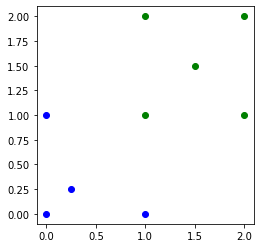

In [17]:
# Prepare to plot points.
x1, x2 = [], []
for i in range(X.shape[0]):
    if X[i, 2] == 1:
        x1.append([X[i, 0], X[i, 1]])
    else:
        x2.append([X[i, 0], X[i, 1]])
x1, x2 = np.array(x1), np.array(x2)

# Plot the points.
plt.axes().set_aspect('equal')
plt.scatter( x1[:, 0], x1[:, 1], color='g')
plt.scatter( x2[:, 0], x2[:, 1], color='b')
plt.show()

We now add the line $~~\frac{4}{3} x_1 + \frac{1}{2} x_2 = 1~~$ to the above plot. 
This is an arbitrary line that you'll need to modify to be the optimal linear decision boundary in problem 2(a) below.

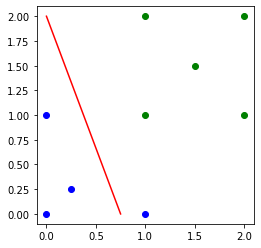

In [18]:
# Prepare to plot points.
x1, x2 = [], []
for i in range(X.shape[0]):
    if X[i, 2] == 1:
        x1.append([X[i, 0], X[i, 1]])
    else:
        x2.append([X[i, 0], X[i, 1]])
x1, x2 = np.array(x1), np.array(x2)

# These parameters define the line
x_intercept, y_intercept = [3/4, 0], [0, 2]
x_vals = [x_intercept[0], y_intercept[0]]
y_vals = [x_intercept[1], y_intercept[1]]

# Plot the lot.
plt.axes().set_aspect('equal')
plt.scatter( x1[:, 0], x1[:, 1], color='g')
plt.scatter( x2[:, 0], x2[:, 1], color='b')
plt.plot(x_vals, y_vals, color='r')
plt.show()

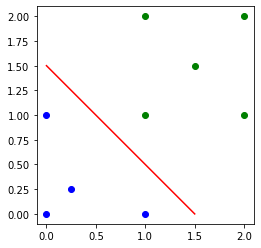

In [19]:
# Prepare to plot points.
x1, x2 = [], []
for i in range(X.shape[0]):
    if X[i, 2] == 1:
        x1.append([X[i, 0], X[i, 1]])
    else:
        x2.append([X[i, 0], X[i, 1]])
x1, x2 = np.array(x1), np.array(x2)

# These parameters define the line
x_intercept, y_intercept = [1.5, 0], [0, 1.5]
x_vals = [x_intercept[0], y_intercept[0]]
y_vals = [x_intercept[1], y_intercept[1]]

# Plot the lot.
plt.axes().set_aspect('equal')
plt.scatter( x1[:, 0], x1[:, 1], color='g')
plt.scatter( x2[:, 0], x2[:, 1], color='b')
plt.plot(x_vals, y_vals, color='r')
plt.show()

## Problem 2(a)  

Adjust the red line above so that it's the optimal separating line.  What is this line's equation?
(Be sure to both modify the above line and type in the line's equation in the given space below)

### YOUR ANSWER HERE
Based on the clarification poster by Rafael:

The modified line's equation is $$\dfrac{2}{3}x_{1}+\dfrac{2}{3}x_{2} = 1$$ (in other form)
$$x_{1} + x_{2} = 1.5$$

## Problem 2(b)  

What are the support vectors? 

### YOUR ANSWER HERE
Points (1,0) and (1,1) form the support vectors. The clarification says that "support vectors are the points that are closest to the maximum margin line". I am not sure but I presume it means it is the vector from the above mentioned points perpendicular to the maximum margin line. 

## Problem 2(c)  

What is the margin? 

### YOUR ANSWER HERE
Margin is basically the perpendicular distance of the points (1,0) and (1,1) form the maximum margin line $x_{1}+x_{2} = 1.5$. The generic formula for the perpendicular distance of a point (n,m) from a line $Ax+By+C=0$ is 
$$d = \dfrac{|An+Bm+C|}{\sqrt(A^{2}+B^{2})}$$
Using this for the above mentioned line and both the points, we have $d=\dfrac{0.5}{\sqrt(2)}$

## Problem 3

Another SVM problem. But first we need training and test datasets.

In [0]:
from numpy.random import randn, seed

seed(137)
XY = [[20*randn(), 20*randn()] for _ in range(500)]
X = np.array([[xy[0], xy[1], np.linalg.norm((xy[0], xy[1]))] for xy in XY])
seed(42)
XY = [[20*randn(), 20*randn()] for _ in range(500)]
X_test = np.array([[xy[0], xy[1], np.linalg.norm((xy[0], xy[1]))] for xy in XY])
for x in X:
    if x[2] < 15:
        x[2] = 0
    elif x[2] < 25:
        x[2] = 1
    elif x[2] < 35:
        x[2] = 2
    else:
        x[2] = 3
for x in X_test:
    if x[2] < 15:
        x[2] = 0
    elif x[2] < 25:
        x[2] = 1
    elif x[2] < 35:
        x[2] = 2
    else:
        x[2] = 3

Now let's look at these points, color coded by their labels

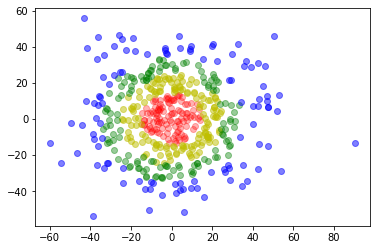

In [21]:
from matplotlib import pyplot as plt

C0 = [(x[0], x[1]) for x in X if x[2]==0]
C1 = [(x[0], x[1]) for x in X if x[2]==1]
C2 = [(x[0], x[1]) for x in X if x[2]==2]
C3 = [(x[0], x[1]) for x in X if x[2]==3]
C0x0, C0x1, C0y = [x[0] for x in C0], [x[1] for x in C0], [0 for _ in C0]
C1x0, C1x1, C1y = [x[0] for x in C1], [x[1] for x in C1], [1 for _ in C1]
C2x0, C2x1, C2y = [x[0] for x in C2], [x[1] for x in C2], [2 for _ in C2]
C3x0, C3x1, C3y = [x[0] for x in C3], [x[1] for x in C3], [3 for _ in C3]
plt.scatter(C0x0, C0x1, c='r', alpha=0.3)
plt.scatter(C1x0, C1x1, c='y', alpha=0.5)
plt.scatter(C2x0, C2x1, c='g', alpha=0.4)
plt.scatter(C3x0, C3x1, c='b', alpha=0.5)
plt.show()

Next we separate out the datapoints $x = (x_1,x_2)$ and their labels, $y$, for both the training set and the test set.  The labels are in $\{0, 1, 2, 3\}$.

In [0]:
x, y = X[:, :2], X[:, 2]
x_test, y_test =  X_test[:, :2], X_test[:, 2]

The following is some code for plotting, etc. You may ignore it.

In [0]:
# For plotting
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

# For classifying
import numpy as np
from sklearn.svm import SVC

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.2):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v') 
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    color='y',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

## Problem 3(a)

Use sklearn's SVC function (imported in the code block above) with the 'rbf' kernel and with gamma=1 and C=1. What are your training and test set accuracies?  Is there evidence of overfitting?

In [24]:
# Create a SVC classifier using an RBF kernel
svm = SVC(C=1.0, kernel='rbf',gamma=1)   ### REPLACE WITH YOUR CODE
# Train the classifier
svm.fit(x, y)
print('Training accuracy =', svm.score(x, y))
print('Test accuracy =', svm.score(x_test, y_test))

Training accuracy = 1.0
Test accuracy = 0.59


### YOUR ANSWERS HERE
Training set accuracy is 1.0 and the test set accuracy is 0.59. It seems like there is overfitting as the training data has been fitted 'perfectly' but it still fails to perform well with the test data.

In [25]:
# Create a SVC classifier using an RBF kernel
svm = SVC(C=1.1, kernel='rbf',gamma=1)   ### REPLACE WITH YOUR CODE
# Train the classifier
svm.fit(x, y)
print('Training accuracy =', svm.score(x, y))
print('Test accuracy =', svm.score(x_test, y_test))

Training accuracy = 1.0
Test accuracy = 0.618


## Problem 3(b)
The test set accuracy is not good. What is the best test set accuracy you can obtain by changing only the C parameter?  What C parameter value yields the best result?  Does it change the training set accuracy?

### YOUR ANSWER HERE
The best test accuracy that I obtained by just changing the C parameter is 0.618. I tried a number of C values. Anything above or equal to 1.1 for C parameter leads to 0.618 accuracy in the test set. Increasing C above 1 does not change the training accuracy (decreasing C does).

## Problem 3(c)
Now set C=1 again, and try modifying the gamma parameter? What gamma value yields the best result? Does it change the training set accuracy?

In [26]:
# Create a SVC classifier using an RBF kernel
svm = SVC(C=1.0, kernel='rbf',gamma=0.01)   ### REPLACE WITH YOUR CODE
# Train the classifier
svm.fit(x, y)
print('Training accuracy =', svm.score(x, y))
print('Test accuracy =', svm.score(x_test, y_test))

Training accuracy = 0.968
Test accuracy = 0.938


### YOUR ANSWER HERE
With value of C fixed, changing gamma leads to variation in both training and test accuracy. Decreasing gamms leads to best results (It does change the training set accuracy). I find that the training accuracy is 0.968 and test accuracy is 0.938 when gamma = 0.01 (and in a similar ballpark range when gamma = 0.1 or 0.001). However decreasing gamma to 0.0001 leads to even terrible results than before. Increasing gamma from 1 is no good either. It decreases the test accuracy without hurting the training accuracy.  

In [27]:
# Create a SVC classifier using an RBF kernel
svm = SVC(C=100, kernel='rbf',gamma=0.001)   ### REPLACE WITH YOUR CODE
# Train the classifier
svm.fit(x, y)
print('Training accuracy =', svm.score(x, y))
print('Test accuracy =', svm.score(x_test, y_test))

Training accuracy = 0.988
Test accuracy = 0.97


## Problem 3(d)
What are the best combination of C and gamma values for getting the best possible test set accuracy? What are your training and test set accuracies for these parameter values?

### YOUR ANSWER HERE
To pinpoint on one particular combination requires a thourough parameter search as both C and gamma affect the training and test set accuracies. However the idea is to have large C and small gamma (within some limits - decreasing gamma too much can lead to worse performance). For an example, C=100 and gamma=0.001 works pretty good and gives training set accuracy of 0.988 and test set accuracy of 0.97. 

### Visualizing the decision regions
Run the following code cells.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

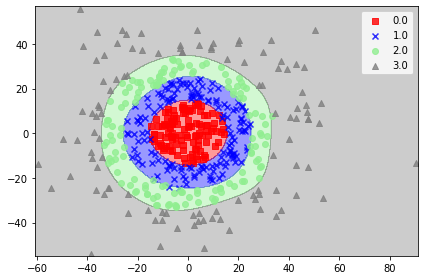

In [28]:
# Visualize the decision boundaries
plot_decision_regions(x, y, classifier=svm)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

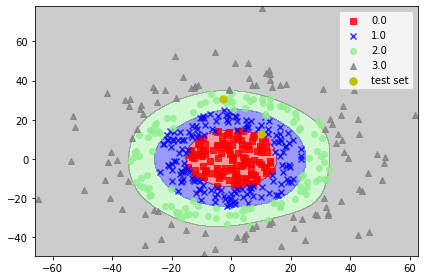

In [29]:
# Visualize the decision boundaries
plot_decision_regions(x_test, y_test, classifier=svm, test_idx=True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Confusion Matrix
It's often useful to look at the confusion matrix to see where the classification errors were made. Run the following two code cells.

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(svm.predict(x), y)

array([[114,   1,   0,   0],
       [  0, 145,   2,   0],
       [  0,   2, 127,   0],
       [  0,   0,   1, 108]])

In [31]:
confusion_matrix(svm.predict(x_test), y_test)

array([[128,   2,   0,   0],
       [  3, 150,   3,   0],
       [  0,   2, 104,   0],
       [  0,   0,   5, 103]])

## Problem 3(e)
How would you interpret the above two confusion matrices? Did your choice of the gamma and C parameters reduce or increase the overfitting?

### YOUR ANSWER HERE
In the confusion matrix, non-diagonal terms represent any misclassification. In the first confusion matrix, we have less error. Calculating the confustion matrix when the gamma and C parameters were the default ones, I found that the values of non-diagonal terms were more as compared to the second confusion matrix above. So that suggests that the new choice of gamma and C does reduce the overfitting. 

## Dimensionality Reduction - PCA

## Problem 4

In [32]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1gZkRoLrxUQTRaU3QXRvzkDbQKp7UqRjX"})   # replace the id with id of file you want to access
downloaded.GetContentFile('faces.zip')                 # replace the file name with your file

In [33]:
!unzip faces.zip

Archive:  faces.zip
   creating: face_data/
   creating: face_data/s2/
  inflating: face_data/s2/1.pgm      
  inflating: face_data/s2/10.pgm     
  inflating: face_data/s2/2.pgm      
  inflating: face_data/s2/3.pgm      
  inflating: face_data/s2/4.pgm      
  inflating: face_data/s2/5.pgm      
  inflating: face_data/s2/6.pgm      
  inflating: face_data/s2/7.pgm      
  inflating: face_data/s2/8.pgm      
  inflating: face_data/s2/9.pgm      
   creating: face_data/s3/
  inflating: face_data/s3/1.pgm      
  inflating: face_data/s3/10.pgm     
  inflating: face_data/s3/2.pgm      
  inflating: face_data/s3/3.pgm      
  inflating: face_data/s3/4.pgm      
  inflating: face_data/s3/5.pgm      
  inflating: face_data/s3/6.pgm      
  inflating: face_data/s3/7.pgm      
  inflating: face_data/s3/8.pgm      
  inflating: face_data/s3/9.pgm      
   creating: face_data/s4/
  inflating: face_data/s4/1.pgm      
  inflating: face_data/s4/10.pgm     
  inflating: face_data/s4/2.pgm      
 

### Images as Vectors

If one flattens out a 112x92 pixel grey scale image, one gets a vector of length 10304. Here we start with 100 faces, 10 for each of 10 people.  So these 100 vectors span a 100 dimensional space, a tiny subspace within the larger 10304 dimensional space of all possible grey scale images with these dimensions. 

We'll use principal component analysis (PCA) to find a smaller set of just 20 images that can recapture a little more than 80% of the variance of the images in the 100 dimensional space. We seek a basis of 20 eigenvectors that can be used to reproduce all the 100 original images fairly well. These are the eigenvectors with the 20 largest eigenvalues in the singular value decomposition that forms the mathematical foundation for PCA.

Since these vectors are representations of faces, they are often referred to as eigenfaces.  

First let's take a look at a face. This way you know you're accessing the data properly.

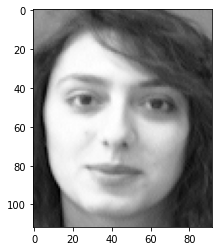

In [34]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt

img = imread('./face_data/s8/2.pgm')
img = img.astype(np.uint8)
img = img / 255
plt.imshow(img,cmap = 'gray')

Let's look at all 100 faces in this dataset.

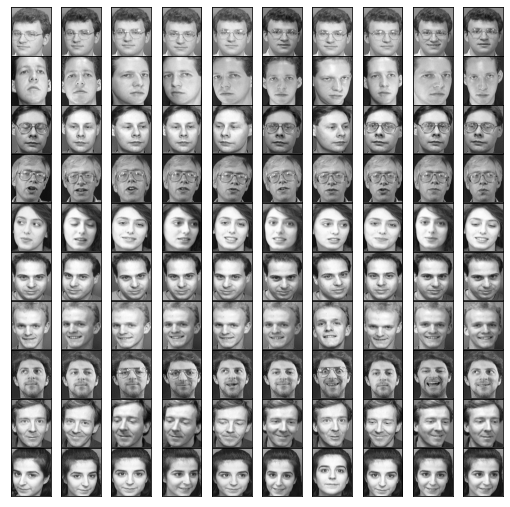

In [35]:
from glob import iglob
faces = pd.DataFrame([])

for path in iglob('./face_data/*/*.pgm'):
    img = imread(path)
    face = pd.Series(img.flatten(), name = path)
    faces = faces.append(face)
 
fig, axes = plt.subplots(10, 10, 
                         figsize = (9, 9),
                         subplot_kw = {'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))
    
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.iloc[i].values.reshape(112, 92), cmap='gray')

### PCA

So let's find those eigenfaces!  We'll use these 20 scarry looking eigenfaces (below) to reproduce the above 100 images.

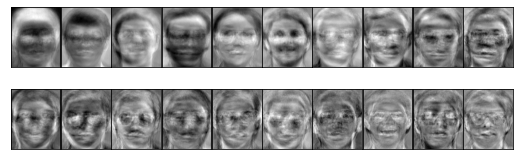

In [36]:
from sklearn.decomposition import PCA

#
# Both of these ways of computing the PCA yield the same results.
#
# n_components=0.805 means it will return the Eigenvectors that explain 80.5% of the variation in the dataset.
# faces_pca = PCA(n_components = 0.805)
# Or we could just say how many dimensions we wish to reduce the data to.
faces_pca = PCA(n_components = 20)
faces_pca.fit(faces)

fig, axes = plt.subplots(2, 10, figsize = (9, 3),
                         subplot_kw = {'xticks': [], 'yticks': []},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(112, 92),cmap='gray')

Now we'll express each of the 100 images as a linear combination of these eigenfacess.

All 100 faces are in the numpy array, faces:

In [37]:
faces.shape

(100, 10304)

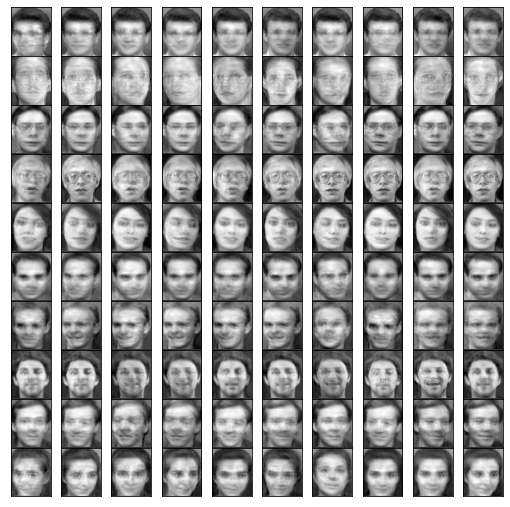

In [38]:
# This command finds the coefficients that describe all the faces in terms of the eigen faces.
# We are projecting from the 100 dimensional face space to a 20 dimensional eigenface space.
components = faces_pca.transform(faces)

# Now we need to do an inverse transform back to the 100 dimensional face space.
projected = faces_pca.inverse_transform(components)

# Let's see what we've accomplished.
fig, axes = plt.subplots(10, 10, 
                         figsize = (9, 9), 
                         subplot_kw = {'xticks': [], 'yticks': []},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(112, 92), cmap = "gray")

This isn't perfect, but not bad.  It represents about a 20% loss of the variation present in the original 100 faces.

### NOTES:

1. Don't specify the number of eigenfaces. Use this form:

        `faces_pca = PCA(n_components = 0.805)`

   (This will find a basis that explains 80.5% of the variance.)

2. You'll find the components_ method of faces_pca useful to find the number of eigenfaces in the basis.

In [0]:
faces_pca = PCA(n_components = 0.90)

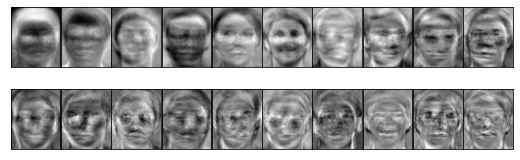

In [40]:
faces_pca.fit(faces)

fig, axes = plt.subplots(2, 10, figsize = (9, 3),
                         subplot_kw = {'xticks': [], 'yticks': []},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(112, 92),cmap='gray')

In [41]:
faces.shape

(100, 10304)

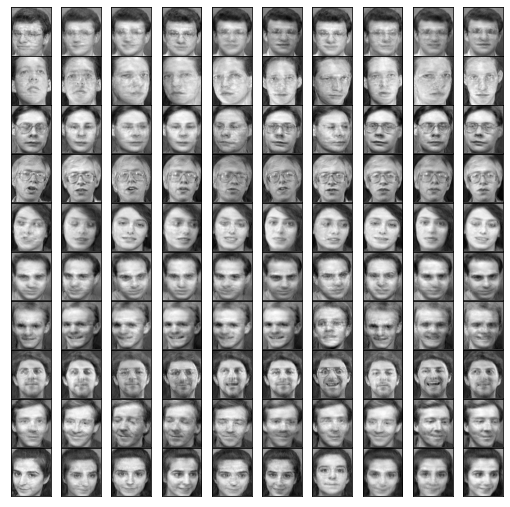

In [42]:
# This command finds the coefficients that describe all the faces in terms of the eigen faces.
# We are projecting from the 100 dimensional face space to a 20 dimensional eigenface space.
components = faces_pca.transform(faces)

# Now we need to do an inverse transform back to the 100 dimensional face space.
projected = faces_pca.inverse_transform(components)

# Let's see what we've accomplished.
fig, axes = plt.subplots(10, 10, 
                         figsize = (9, 9), 
                         subplot_kw = {'xticks': [], 'yticks': []},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(112, 92), cmap = "gray")

In [43]:
faces_pca.components_.shape

(40, 10304)

## Problem 4(a)

Above we've seen how a 20 eigenface basis can explain about 80% of the variance in the 100 original face images.
How many eigenfaces would you need in order to explain 90% of the variance.

### YOUR ANSWER HERE
40

## Problem 4(b)

How many eigenfaces would you need in order to explain 95% of the variance.

### YOUR ANSWER HERE
60
The below calculation shows how I got 60

In [0]:
faces_pca = PCA(n_components=0.95)

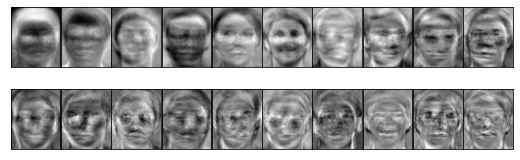

In [45]:
faces_pca.fit(faces)

fig, axes = plt.subplots(2, 10, figsize = (9, 3),
                         subplot_kw = {'xticks': [], 'yticks': []},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(112, 92),cmap='gray')

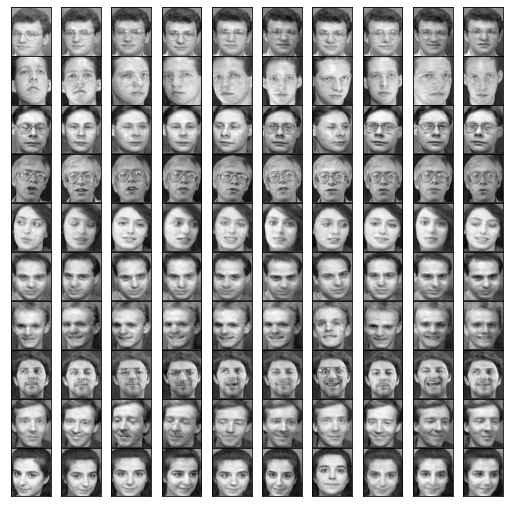

In [46]:
# This command finds the coefficients that describe all the faces in terms of the eigen faces.
# We are projecting from the 100 dimensional face space to a 20 dimensional eigenface space.
components = faces_pca.transform(faces)

# Now we need to do an inverse transform back to the 100 dimensional face space.
projected = faces_pca.inverse_transform(components)

# Let's see what we've accomplished.
fig, axes = plt.subplots(10, 10, 
                         figsize = (9, 9), 
                         subplot_kw = {'xticks': [], 'yticks': []},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(112, 92), cmap = "gray")

In [47]:
faces_pca.components_.shape

(60, 10304)

## Problem 4(c)

How many eigenfaces would you need in order to explain 98% of the variance.

### YOUR ANSWER HERE
79
The below calculation shows how I got 79

In [0]:
faces_pca = PCA(n_components=0.98)

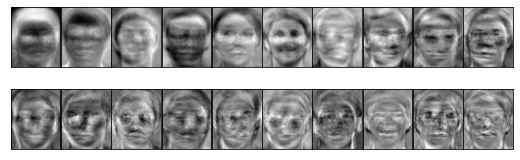

In [49]:
faces_pca.fit(faces)

fig, axes = plt.subplots(2, 10, figsize = (9, 3),
                         subplot_kw = {'xticks': [], 'yticks': []},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(112, 92),cmap='gray')

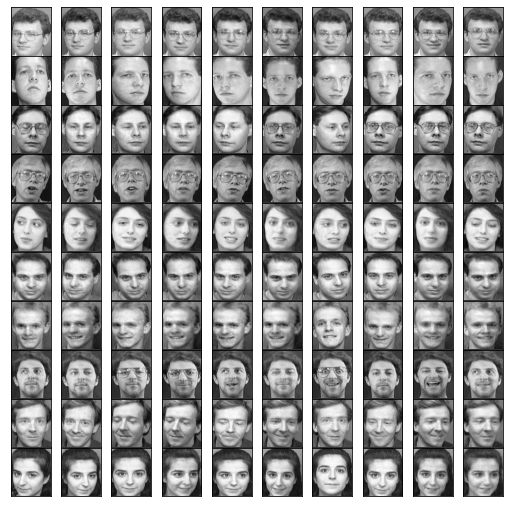

In [50]:
# This command finds the coefficients that describe all the faces in terms of the eigen faces.
# We are projecting from the 100 dimensional face space to a 20 dimensional eigenface space.
components = faces_pca.transform(faces)

# Now we need to do an inverse transform back to the 100 dimensional face space.
projected = faces_pca.inverse_transform(components)

# Let's see what we've accomplished.
fig, axes = plt.subplots(10, 10, 
                         figsize = (9, 9), 
                         subplot_kw = {'xticks': [], 'yticks': []},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(112, 92), cmap = "gray")

In [51]:
faces_pca.components_.shape

(79, 10304)